### Test with 50000 Datapoints

In [2]:
import data as d

##### 5000 * 10 Datapoints, 1600 samples

In [3]:
data_list = d.get_data(5000, 16, 25, 10)

2818.06952
2574.23186


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import model_gru as m
import tree_net as TN
import imp
imp.reload(m)
imp.reload(TN)
imp.reload(TN.helper)


<module 'helper' from 'C:\\Users\\Hendrik\\Documents\\GitHub\\ModelTreeGRU\\helper.py'>

In [23]:
tree_n = TN.TreeNet([50, 250, 500], 10, [50, 10, 10], 0.001)

loss_f = nn.MSELoss()

Parameter list contains 42 entries!


In [24]:
for e in range(500):
    
    avg_loss = 0.0
    
    for b in data_list:
        tree_n.zero_grad()
        
        b_t = torch.from_numpy(b).float().cuda()
        
        states = tree_n.forward(b_t)
        predicted = tree_n.backward(states)
        
        loss = loss_f(predicted, b_t)
        
        loss.backward()
        
        tree_n.optimizer.step()
        
        avg_loss += loss
        
    avg_loss /= len(data_list)
    
    print(e, avg_loss)
        

0 tensor(0.0428, device='cuda:0', grad_fn=<DivBackward0>)


KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt

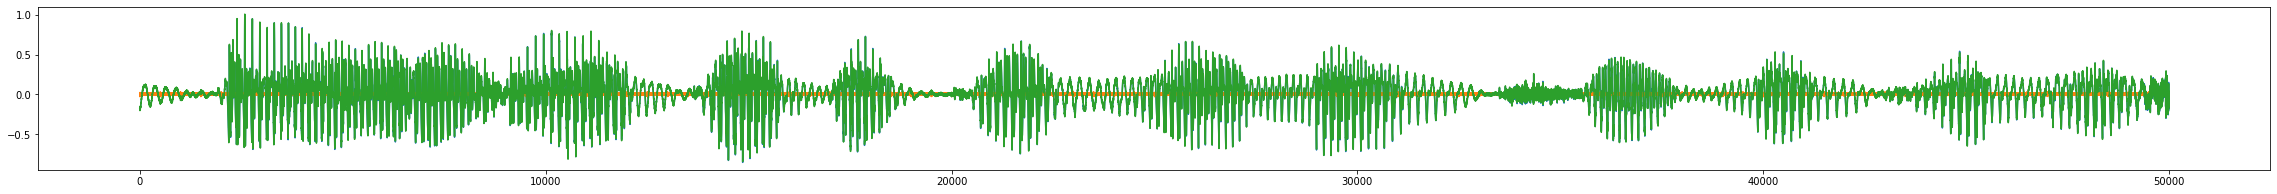

In [25]:
idx = 9
plt.plot(b[:,idx,:].reshape((-1,)))
plt.plot(predicted[:,idx,:].cpu().detach().numpy().reshape((-1,)))
plt.plot(b[:,idx,:].reshape((-1,)) - predicted[:,idx,:].cpu().detach().numpy().reshape((-1,)))
plt.rcParams["figure.figsize"] = (40,3)